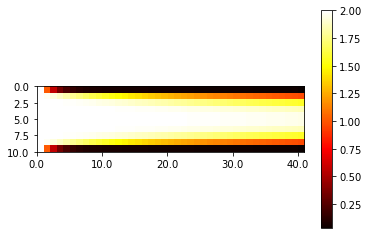

In [1]:
%reset -f
%load_ext autoreload
%autoreload 2

import numpy as np
import Odin

# validation test for incompressible flow

geom = Odin.createGeometry( 'rectangle', [40,10] )
mesh = Odin.createMesh( geom, res=1 )

# make just a list, give a name as optional parameter to flow model
# make this a flowmodeles constructor with kwargs here and then remove simulation instance
myFlowModels = {
    'u' : Odin.TransportModels.staggeredTransport_u,
    'v' : Odin.TransportModels.staggeredTransport_v,
    'p' : Odin.PressureModels.Pressure
}

passiveFields = {
    # 'u' : 'faces_u',
    # 'v' : 'faces_v'
    #'p' : 'scalarCV'
}

#remove 'Simulation'. I don't need it
sim1 = Odin.Simulation(flowmodels=myFlowModels, mesh=mesh, geometry=geom, passiveFields=passiveFields )

myFields = sim1.fieldRegistry
u=myFields['u']
v=myFields['v']
p = myFields['p']

# relates to viscosity:
u.govModel.setDiffusionCoefficient(0.1)
#v.govModel.setDiffusionCoefficient(1)

u.data.fill(3.0)
#u.defineBoundaryCondition(boundaryName='top', boundaryType='fixedValue', value=0)
#Odin.defineBoundaryCondition(field=u, fieldReg=myFields, boundaryName='bottom', boundaryType='fixedValue', value=0)

#Odin.defineBoundaryCondition(field=u, fieldReg=myFields, boundaryName='top', boundaryType='zeroGradient')
# Odin.defineBoundaryCondition(field=u, fieldReg=myFields, boundaryName='bottom', boundaryType='zeroGradient')

Odin.defineBoundaryCondition(field=u, fieldReg=myFields, boundaryName='top', boundaryType='fixedValue', value=0)
Odin.defineBoundaryCondition(field=u, fieldReg=myFields, boundaryName='bottom', boundaryType='fixedValue', value=0 )
Odin.defineBoundaryCondition(field=u, fieldReg=myFields, boundaryName='left', boundaryType='fixedValue', value=2 )
Odin.defineBoundaryCondition(field=u, fieldReg=myFields, boundaryName='right', boundaryType='zeroGradient')

# Odin.defineBoundaryCondition(field=u, fieldReg=myFields, boundaryName='top', boundaryType='fixedValue', value=0)
# Odin.defineBoundaryCondition(field=u, fieldReg=myFields, boundaryName='bottom', boundaryType='zeroGradient' )
# Odin.defineBoundaryCondition(field=u, fieldReg=myFields, boundaryName='left', boundaryType='zeroGradient' )
# Odin.defineBoundaryCondition(field=u, fieldReg=myFields, boundaryName='right', boundaryType='fixedValue', value=-2)


#print("u \t", u.data)

v.data.fill(0.0)
Odin.defineBoundaryCondition(field=v, fieldReg=myFields, boundaryName='top', boundaryType='fixedValue', value=0)
Odin.defineBoundaryCondition(field=v, fieldReg=myFields, boundaryName='bottom', boundaryType='fixedValue', value=0)
Odin.defineBoundaryCondition(field=v, fieldReg=myFields, boundaryName='left', boundaryType='fixedValue', value=0 )
Odin.defineBoundaryCondition(field=v, fieldReg=myFields, boundaryName='right', boundaryType='zeroGradient')

p.data.fill(0.0)
Odin.defineBoundaryCondition(field=p, fieldReg=myFields, boundaryName='top', boundaryType='zeroGradient')
Odin.defineBoundaryCondition(field=p, fieldReg=myFields, boundaryName='bottom', boundaryType='zeroGradient')
Odin.defineBoundaryCondition(field=p, fieldReg=myFields, boundaryName='left', boundaryType='zeroGradient')
Odin.defineBoundaryCondition(field=p, fieldReg=myFields, boundaryName='right', boundaryType='fixedValue', value=2)
#print("p \t", p.data)

for i in range(1):
    u.data = Odin.solve(u)
    sim1.display(u,mesh)
#    input()
    #print("u \t", u.data)

#sim1.display(u,mesh)
# print(np.fmin(u.govModel._linSystem._A,10))
# print(np.fmin(u.govModel._linSystem._b,10))

#v.data = sim1.solve(v)
#sim1.display(v,mesh)
#print("v \t", v.data)

#p.data = p.data - sim1.solve(p)
#sim1.display(p,mesh)
#print("p \t", p.data)



In [ ]:
# shutting the interpreter down, so I can a fresh instance next time.
# my modules are automatically checked for updates
import os
os._exit(00)
